## Imports

In [96]:
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, restoration, feature, transform
from sklearn import ensemble
import numpy as np

## Load Test Image

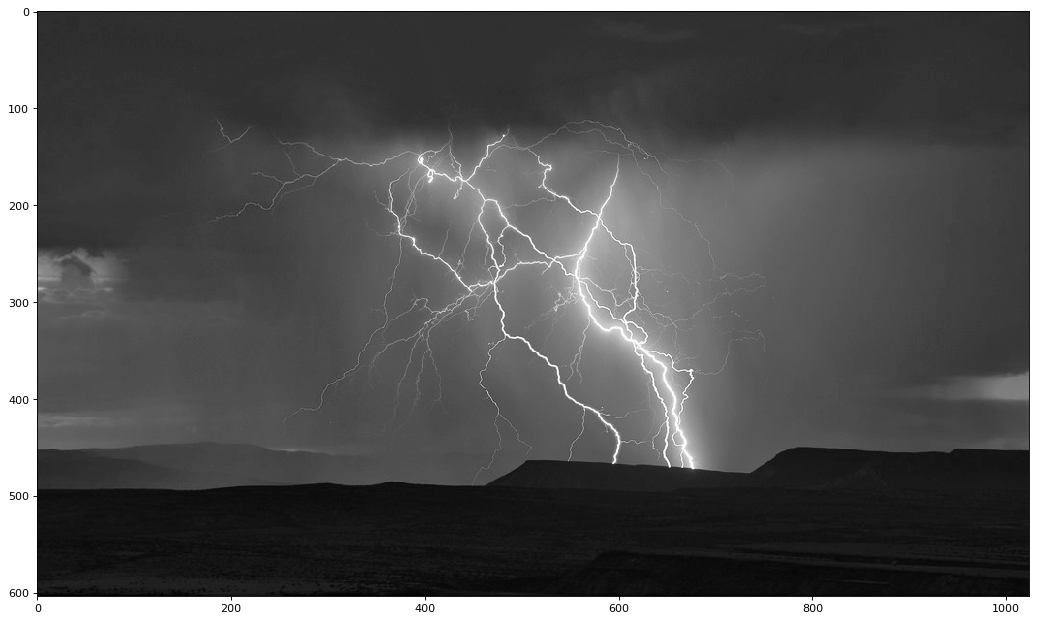

In [13]:
image = io.imread('img/lightning.jpg', as_gray=True)
plt.figure(num=None, figsize=(16, 12), dpi=80)
plt.imshow(image, cmap=plt.cm.Greys_r)

### Hand-Picked Ground Truth Labels

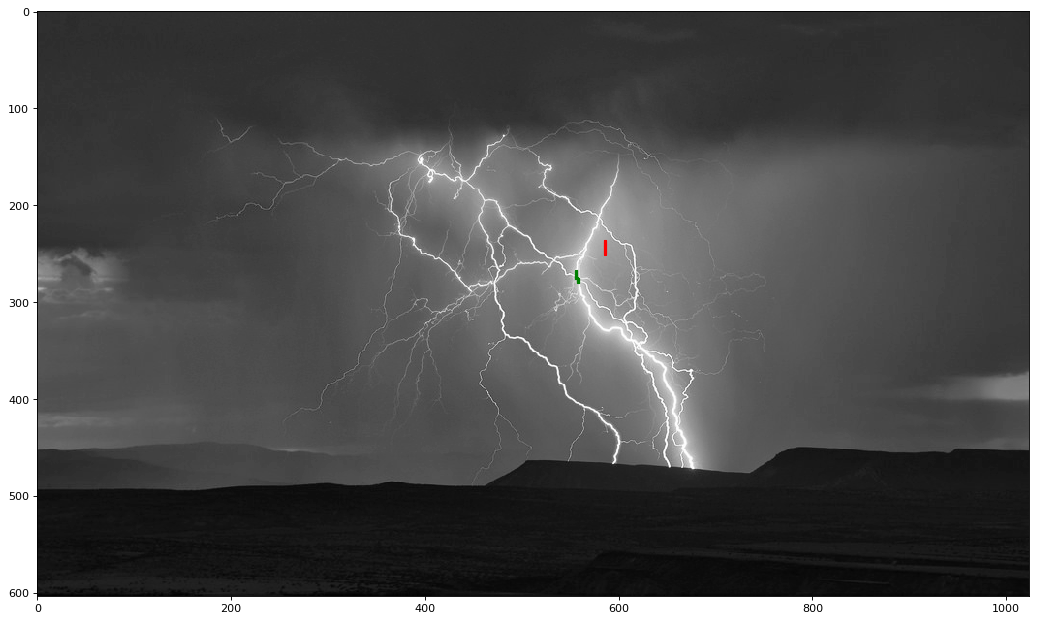

In [108]:
plt.figure(num=None, figsize=(16, 12), dpi=80)
plt.imshow(image, cmap=plt.cm.Greys_r)

lightning_samples = np.array([[556, 268],
                              [556, 269],
                              [556, 270],
                              [556, 271],
                              [556, 272],
                              [556, 273],
                              [556, 274],
                              [556, 275],
                              [557, 275],
                              [558, 276],
                              [558, 277],
                              [558, 278],
                              [556, 279]])

background_samples = np.array([[586, 237],
                               [586, 238],
                               [586, 239],
                               [586, 240],
                               [586, 241],
                               [586, 242],
                               [586, 243],
                               [586, 244],
                               [587, 245],
                               [588, 246],
                               [588, 247],
                               [588, 248],
                               [586, 249],
                               [586, 250]])

plt.scatter([556, 556, 556, 556, 556, 556, 556, 556, 557, 558, 558, 558, 558],
            [268, 269, 270, 271, 272, 273, 274, 275, 275, 276, 277, 278, 279], color='green', s=1, marker=',')

plt.scatter([586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586],
            [237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250], color='red', s=1, marker=',')

Note, below that the indices are swapped from what we might think. This is important and will need to be ensured that we do the same when we construct our training data.

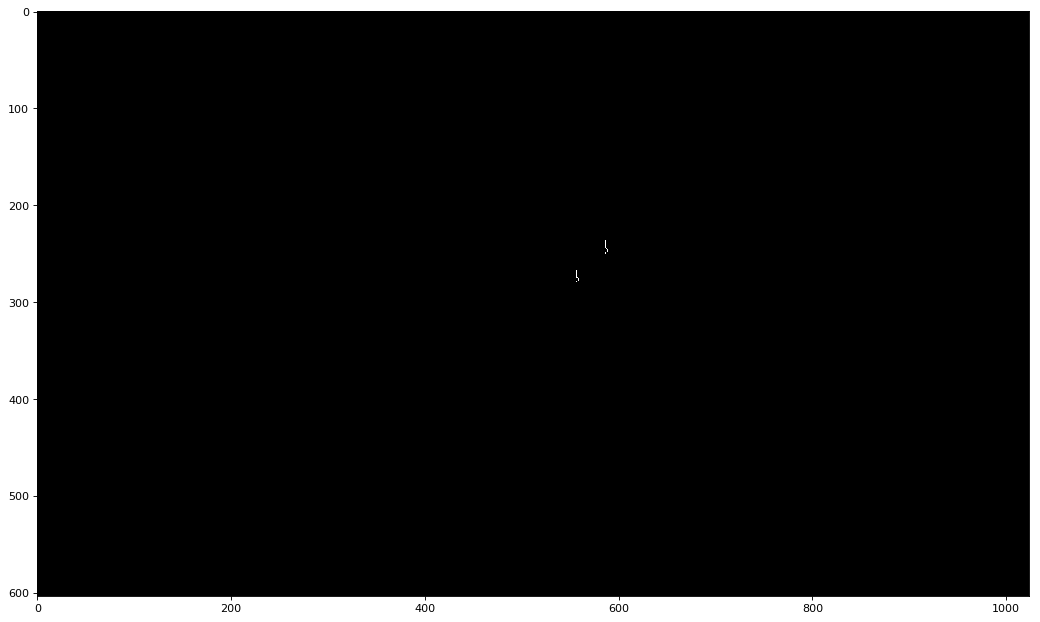

In [156]:
labeled_image = np.zeros(image.shape)

for sample in lightning_samples:
    labeled_image[sample[1], sample[0]] = 1

for sample in background_samples:
    labeled_image[sample[1], sample[0]] = 1    
    

plt.figure(num=None, figsize=(16, 12), dpi=80)
plt.imshow(labeled_image, cmap=plt.cm.Greys_r)

## Apply A Few Simple Filters

### Gaussian Blur

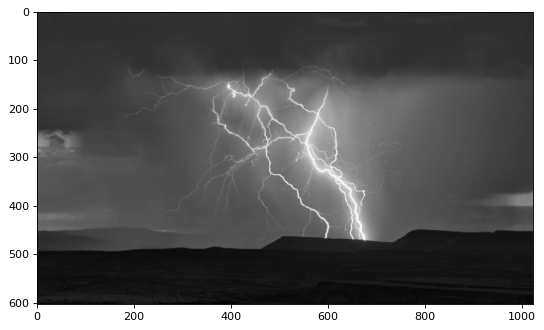

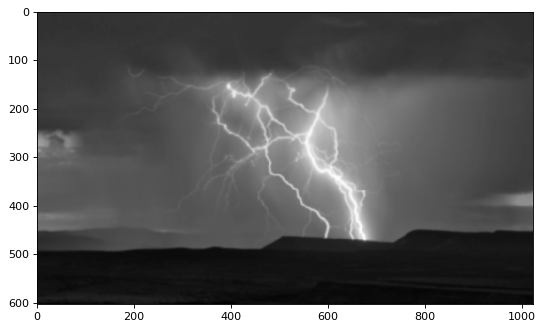

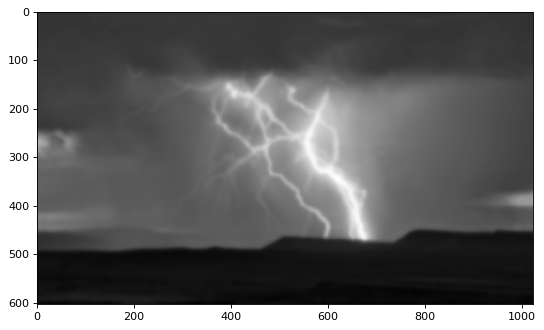

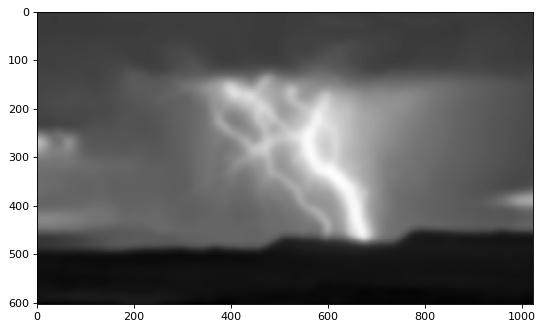

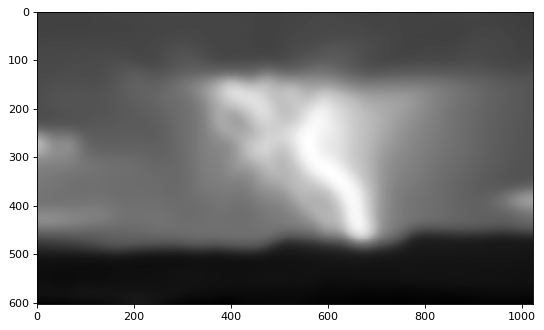

In [57]:
blur_images = []
for i in range(0,5):
    blur_images.append(filters.gaussian(image, sigma=2**i))
    
for blur_image in blur_images:
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(blur_image, cmap=plt.cm.Greys_r)

### Difference of Gaussians

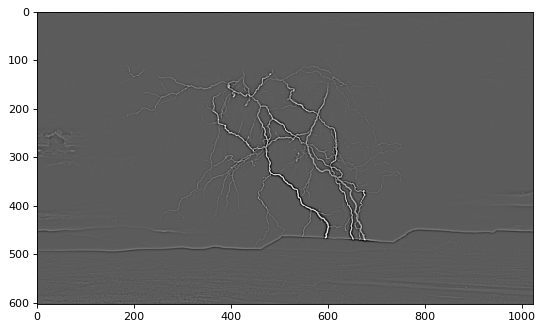

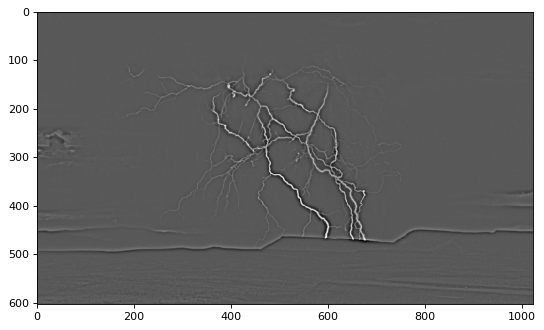

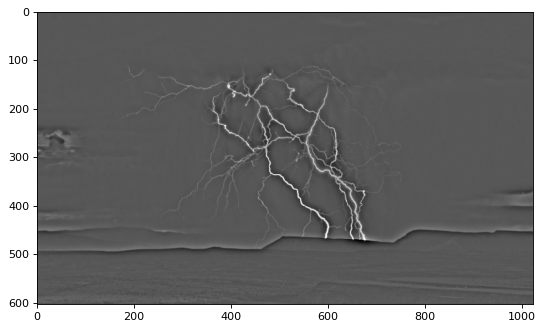

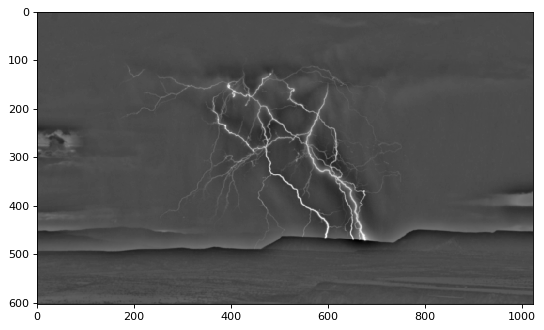

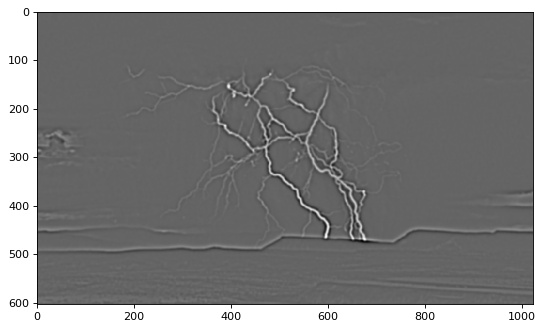

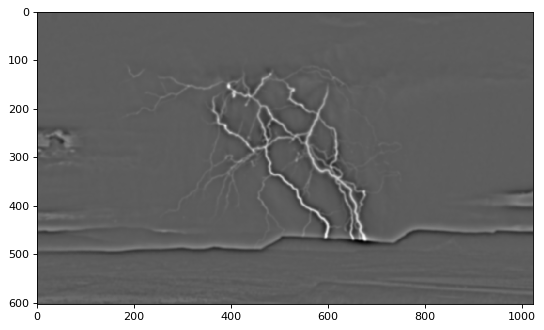

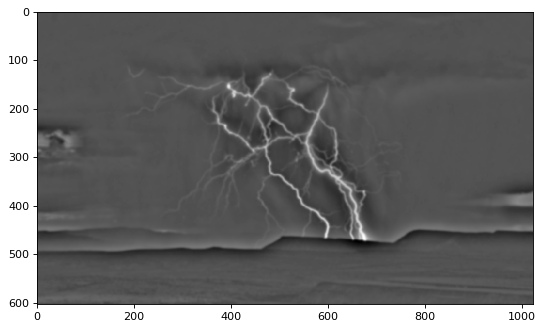

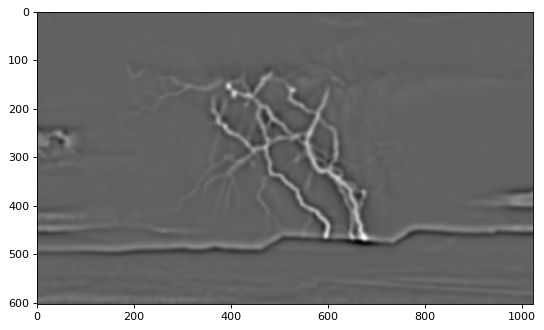

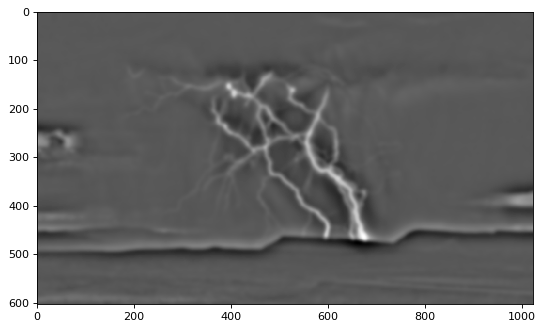

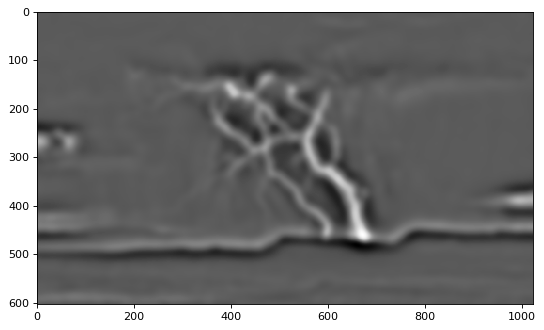

In [58]:
diff_images = []
for i, blur in enumerate(blur_images):
    for blur2 in blur_images[i+1:]:
        diff_images.append(blur-blur2)

for diff_image in diff_images:
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(diff_image, cmap=plt.cm.Greys_r)

### Membrane Projections

In [60]:
# TODO

### Sobel Filter

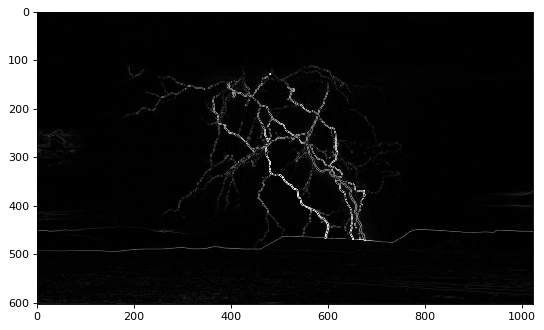

In [26]:
sobel_image = filters.sobel(image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(sobel_image, cmap=plt.cm.Greys_r)

### Hessian Filter

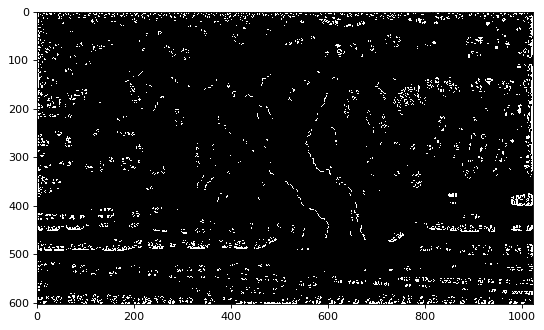

In [28]:
hessian_image = filters.hessian(image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(hessian_image, cmap=plt.cm.Greys_r)

### Mean Filter

/home/maljovec/anaconda3/envs/regulus/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


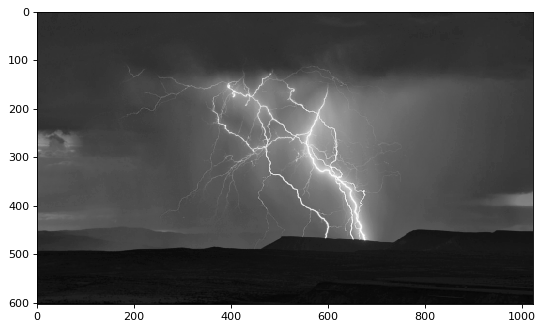

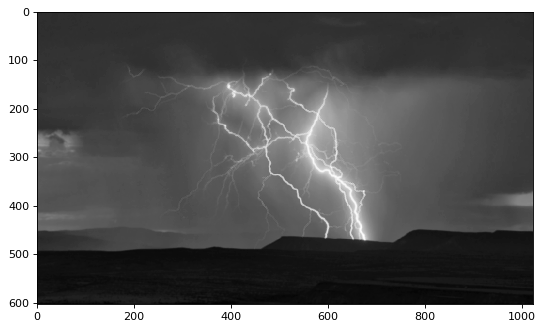

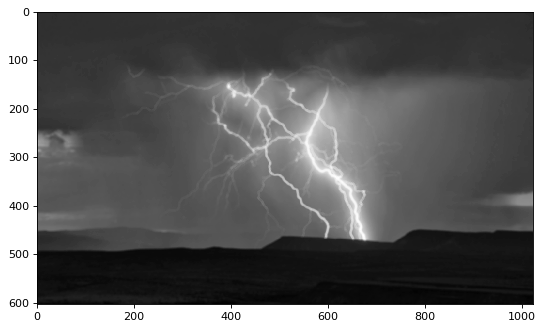

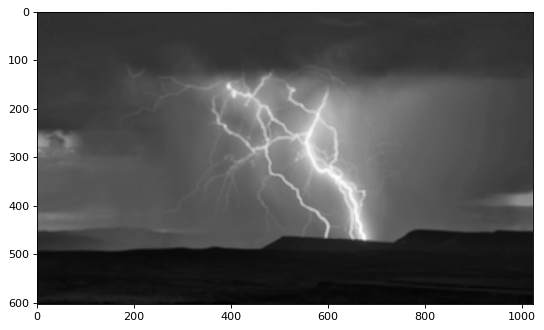

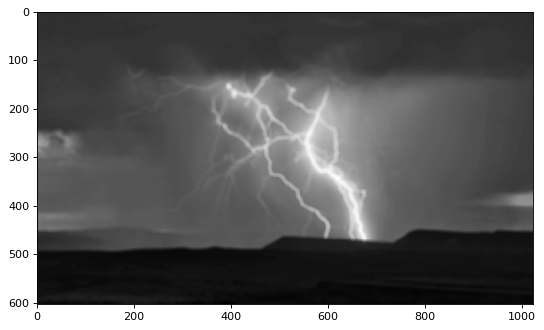

In [40]:
mean_images = []
for i in range(1,6):
    mean_images.append(filters.rank.mean(image, selem=morphology.disk(i)))

for mean_image in mean_images:
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(mean_image, cmap=plt.cm.Greys_r)

### Variance Filter

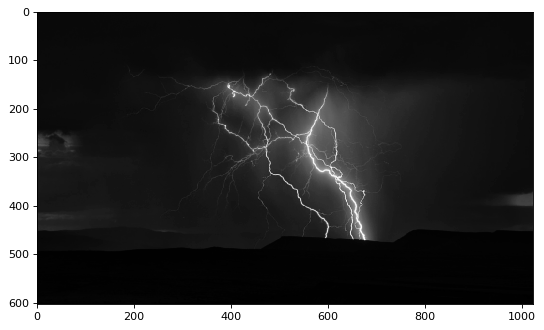

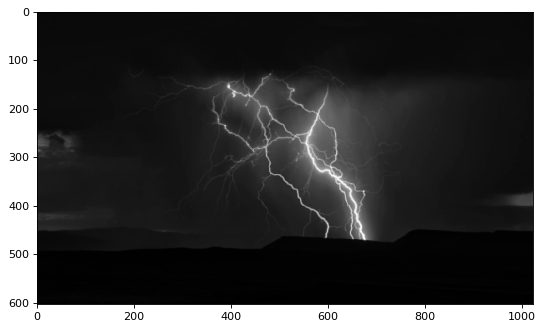

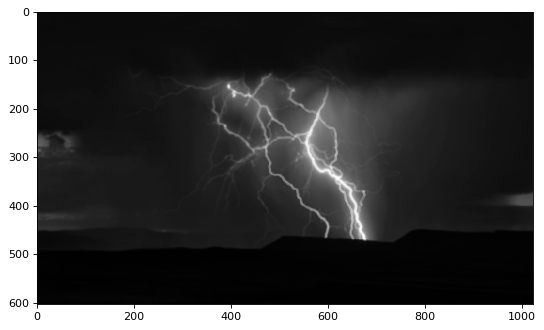

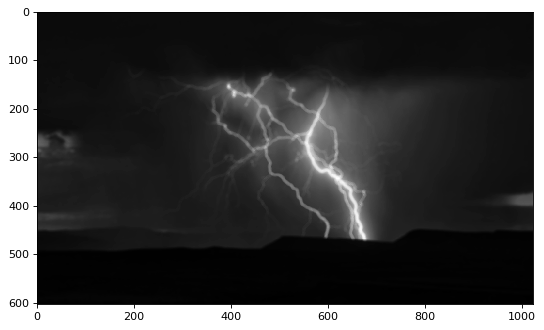

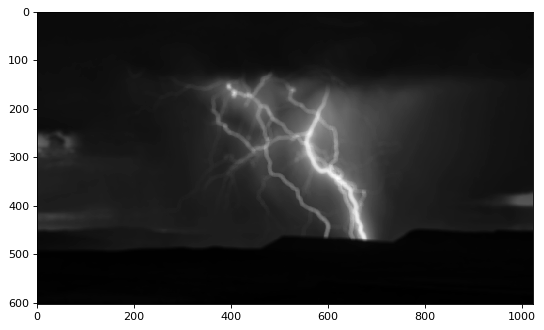

In [44]:
variance_images = []
for mean_image in mean_images:
    variance_images.append(np.power(image-mean_image,2))
    
for variance_image in variance_images:
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(variance_image, cmap=plt.cm.Greys_r)

### Median Filter

/home/maljovec/anaconda3/envs/regulus/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


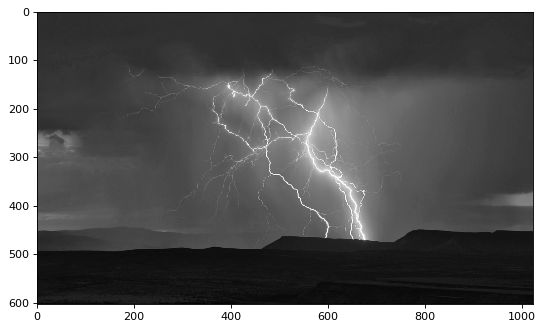

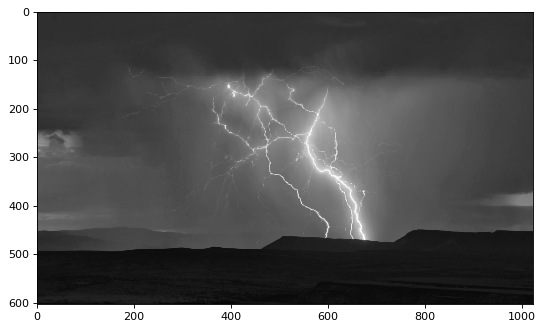

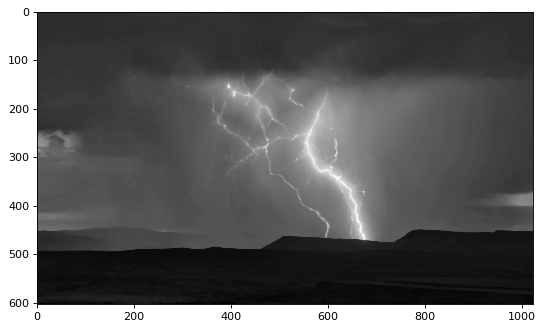

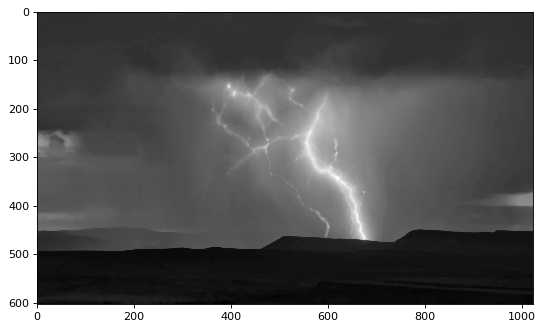

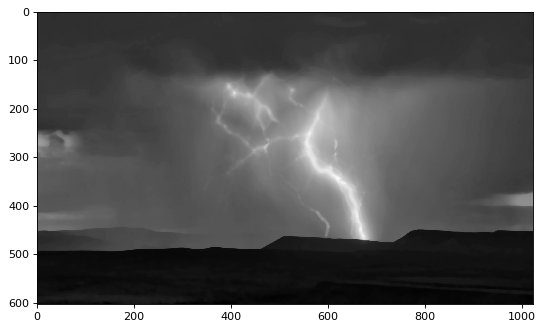

In [41]:
median_images = []
for i in range(1,6):
    median_images.append(filters.rank.median(image, selem=morphology.disk(i)))

for median_image in median_images:
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(median_image, cmap=plt.cm.Greys_r)

### Minimum Filter

/home/maljovec/anaconda3/envs/regulus/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


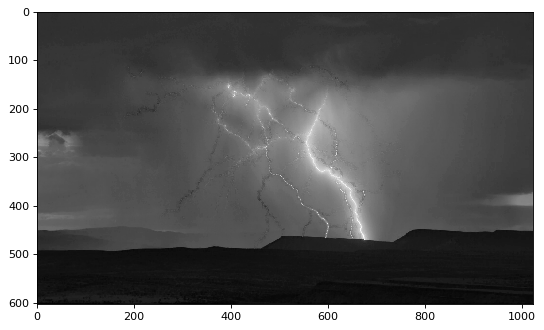

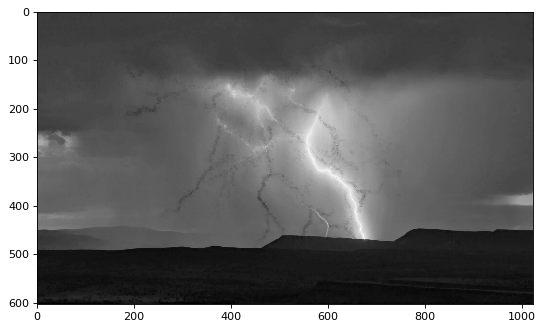

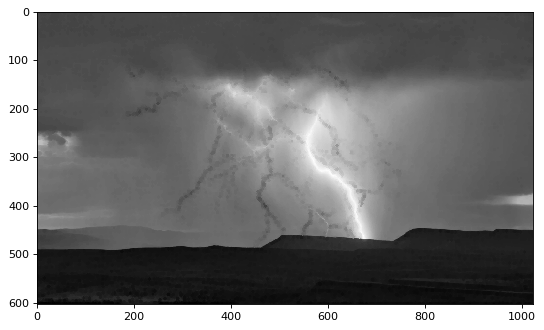

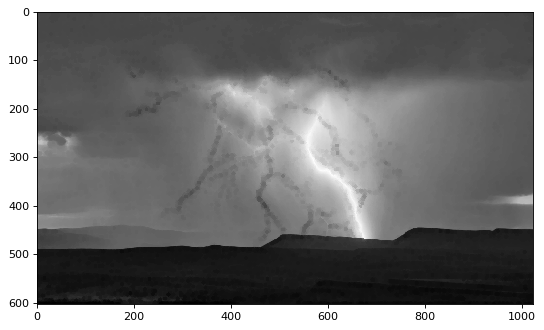

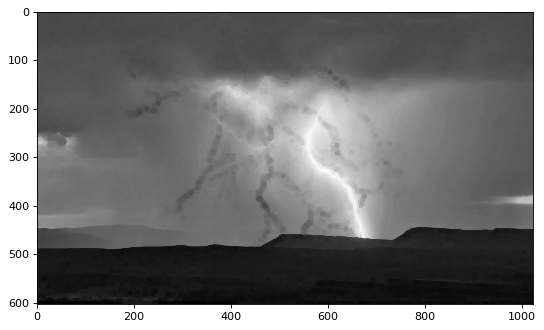

In [42]:
minimum_images = []
for i in range(1,6):
    minimum_images.append(filters.rank.minimum(image, selem=morphology.disk(i)))

for minimum_image in minimum_images:
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(minimum_image, cmap=plt.cm.Greys_r)

### Maximum Filter

/home/maljovec/anaconda3/envs/regulus/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


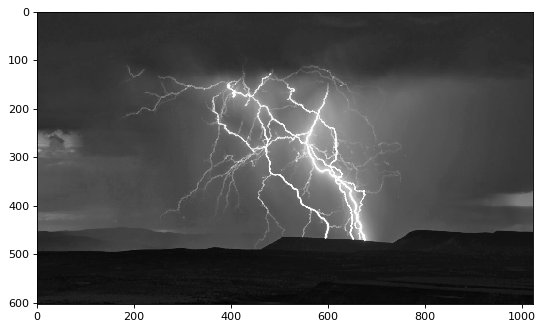

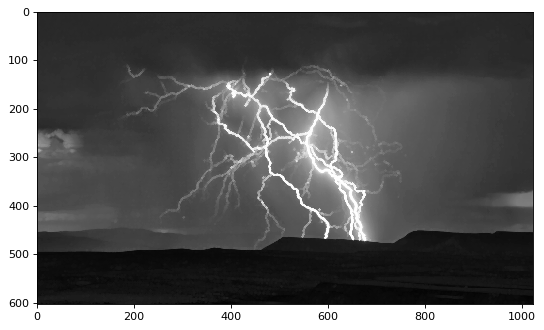

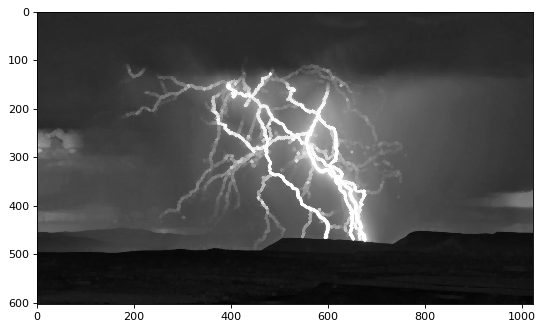

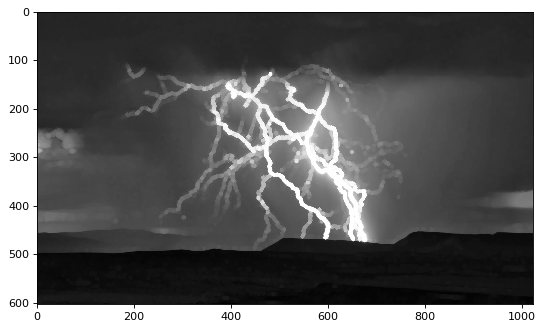

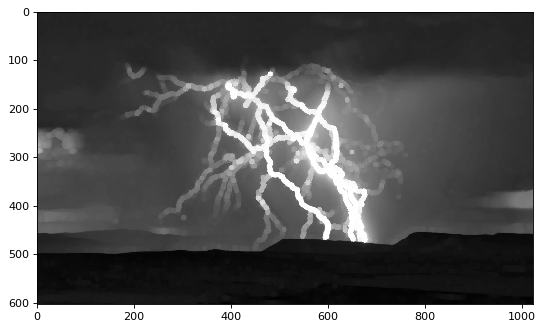

In [43]:
maximum_images = []
for i in range(1,6):
    maximum_images.append(filters.rank.maximum(image, selem=morphology.disk(i)))

for maximum_image in maximum_images:
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(maximum_image, cmap=plt.cm.Greys_r)

### Anisotropic Diffusion

In [61]:
# TODO

### Bilateral Filter

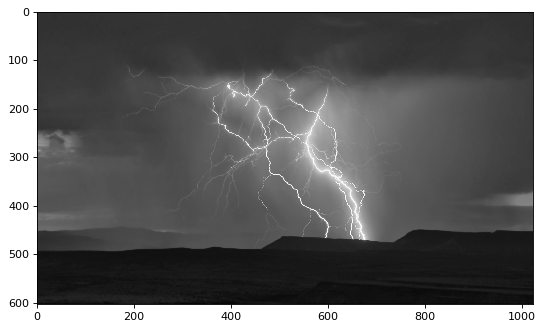

In [68]:
# TODO ensure parameters match the Weka specification (I'm just using the defaults for now)
bilateral_image = restoration.denoise_bilateral(image, win_size=None, sigma_color=None, sigma_spatial=1, bins=10000, mode='constant', cval=0, multichannel=False)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(bilateral_image, cmap=plt.cm.Greys_r)

### Lipschitz Filter

In [ ]:
# TODO


### Kuwahara Filter

### Gabor Filter

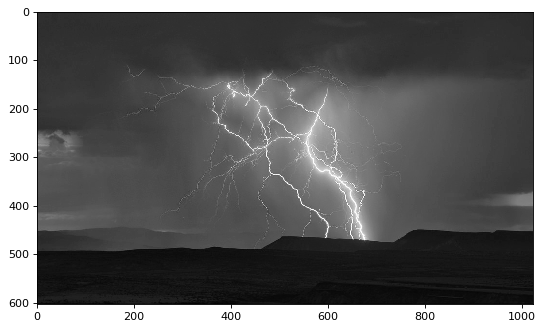

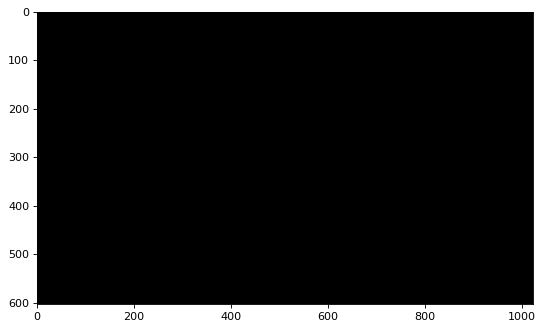

In [75]:
# TODO: learn more about this filter and what values to use for frequency.
gabor_real_image, gabor_complex_image = filters.gabor(image, frequency=3, theta=0, bandwidth=1, sigma_x=None, sigma_y=None, n_stds=3, offset=0, mode='reflect', cval=0)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(gabor_real_image, cmap=plt.cm.Greys_r)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(gabor_complex_image, cmap=plt.cm.Greys_r)

### Derivative Filters

In [80]:
# TODO

### Laplacian Filter

/home/maljovec/anaconda3/envs/regulus/lib/python3.7/site-packages/skimage/restoration/uft.py:447: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  impr[([slice(1, 2)] * ndim)] = 2.0 * ndim


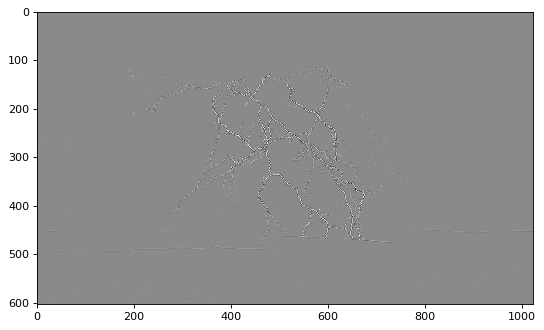

In [79]:
laplace_image = filters.laplace(image, ksize=3)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(laplace_image, cmap=plt.cm.Greys_r)

### Structure Filter

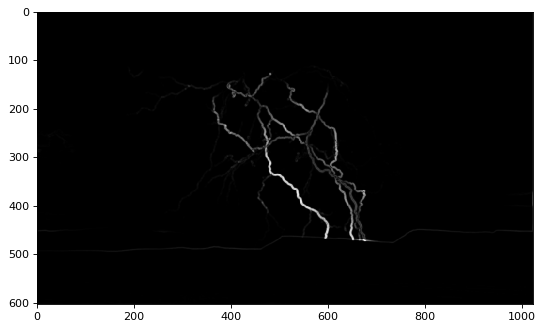

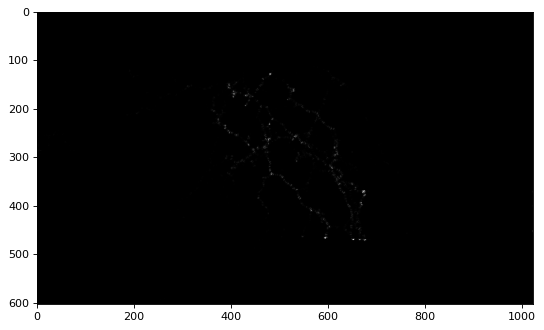

In [93]:
structure_tensor = feature.structure_tensor(image, sigma=1, mode='constant', cval=0)
largest_eig_image = np.zeros(shape=image.shape)
smallest_eig_image = np.zeros(shape=image.shape)
for row in range(structure_tensor[0].shape[0]):
    for col in range(structure_tensor[0].shape[1]):
        Axx = structure_tensor[0][row, col]
        Axy = structure_tensor[1][row, col]
        Ayy = structure_tensor[2][row, col]
        eigs = np.linalg.eigvals([[Axx, Axy], [Axy, Ayy]])
        largest_eig_image[row, col] = np.max(eigs)
        smallest_eig_image[row, col] = np.min(eigs)
        
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(largest_eig_image, cmap=plt.cm.Greys_r)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(smallest_eig_image, cmap=plt.cm.Greys_r)

### Entropy Filter

/home/maljovec/anaconda3/envs/regulus/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


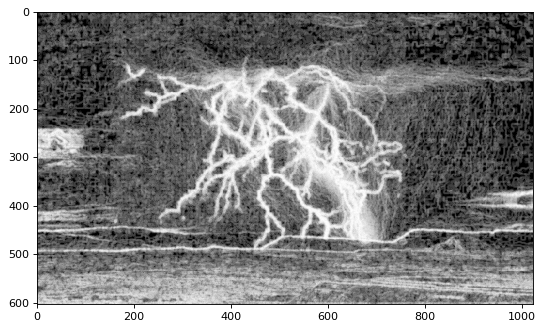

In [94]:
entropy_image = filters.rank.entropy(image, selem=morphology.disk(3))

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(entropy_image, cmap=plt.cm.Greys_r)

### Neighbors

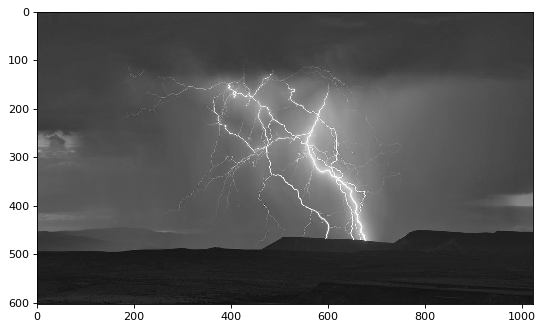

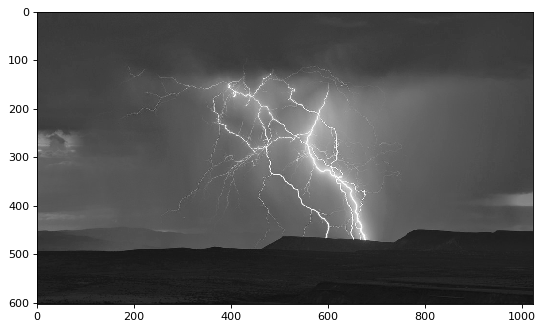

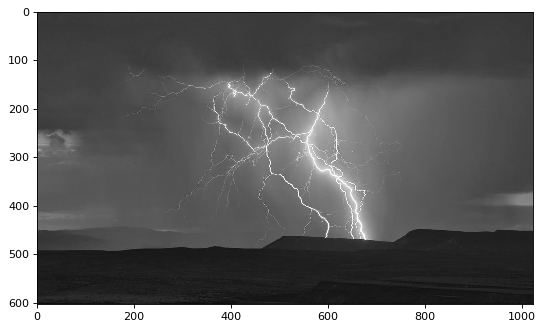

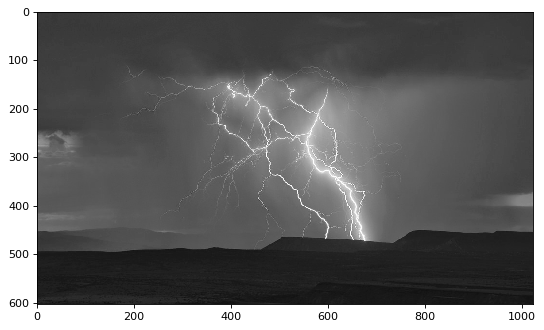

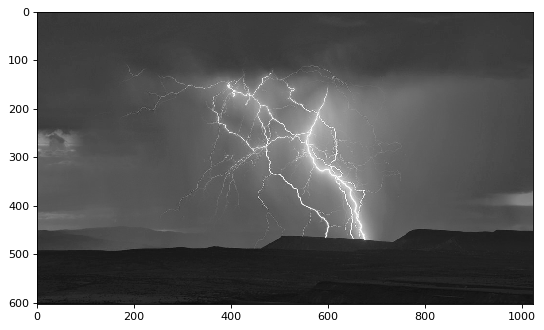

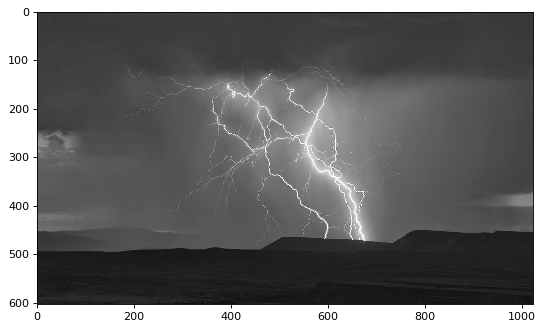

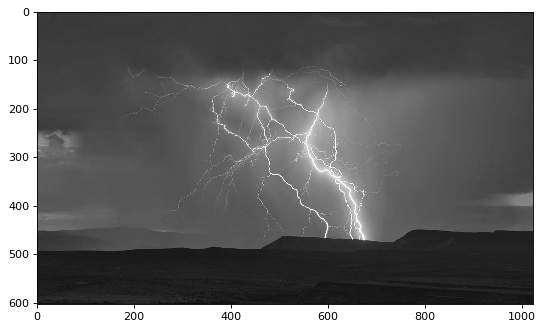

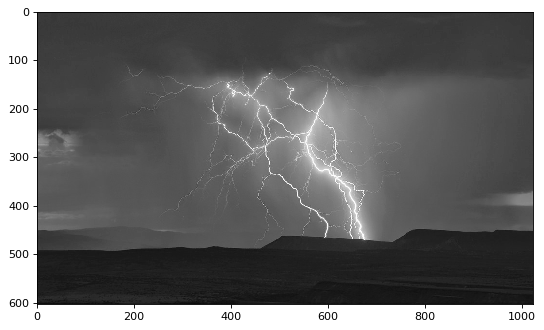

In [102]:
neighbor_images = []
directions = [(-1,-1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
sigma = 1

for t in directions:
    for sigma in range(1, sigma+1):
        tform = transform.SimilarityTransform(scale=1, rotation=0, translation=tuple([sigma*val for val in t]))
        neighbor_images.append(transform.warp(image, tform))
        
for neighbor_image in neighbor_images:
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(neighbor_image, cmap=plt.cm.Greys_r)

## Build a Random Forest

In [157]:
# First grab all of the single image variables
growing_tuple = (image,
                 sobel_image,
                 hessian_image,
                 bilateral_image,
                 gabor_real_image,
                 laplace_image,
                 largest_eig_image,
                 smallest_eig_image,
                 entropy_image)

# Then add all of the multiple image variables
growing_tuple += tuple(diff_images)
growing_tuple += tuple(mean_images)
growing_tuple += tuple(variance_images)
growing_tuple += tuple(median_images)
growing_tuple += tuple(minimum_images)
growing_tuple += tuple(maximum_images)
growing_tuple += tuple(neighbor_images)

compiled_data = np.dstack(growing_tuple)
print(compiled_data.shape)

(604, 1024, 52)


In [158]:
class_lightning = compiled_data[lightning_samples[:, 1], lightning_samples[:, 0], :]
class_background = compiled_data[background_samples[:, 1], background_samples[:, 0], :]
train_x = np.vstack((class_lightning, class_background))
train_y = np.hstack((np.ones(class_lightning.shape[0]), np.zeros(class_background.shape[0])))

In [159]:
classifier = ensemble.RandomForestClassifier(n_estimators=10,
                                             criterion='gini',
                                             max_depth=None,
                                             min_samples_split=2,
                                             min_samples_leaf=1,
                                             min_weight_fraction_leaf=0.0,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             bootstrap=True,
                                             oob_score=False,
                                             n_jobs=1,
                                             random_state=None,
                                             verbose=0,
                                             warm_start=False,
                                             class_weight=None)

classifier.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

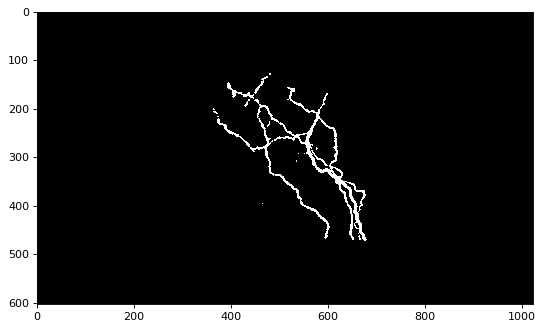

In [160]:
flattened_data = compiled_data.reshape(-1, compiled_data.shape[-1])
predicted_labels = classifier.predict(flattened_data)
predicted_labels = predicted_labels.reshape(compiled_data.shape[0], compiled_data.shape[1])

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(predicted_labels, cmap=plt.cm.Greys_r)